In [188]:
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plot
from plottable import Table, ColumnDefinition

from figure import FontWeight

"""
参考教程：
  - 
"""
dpi_save = 500

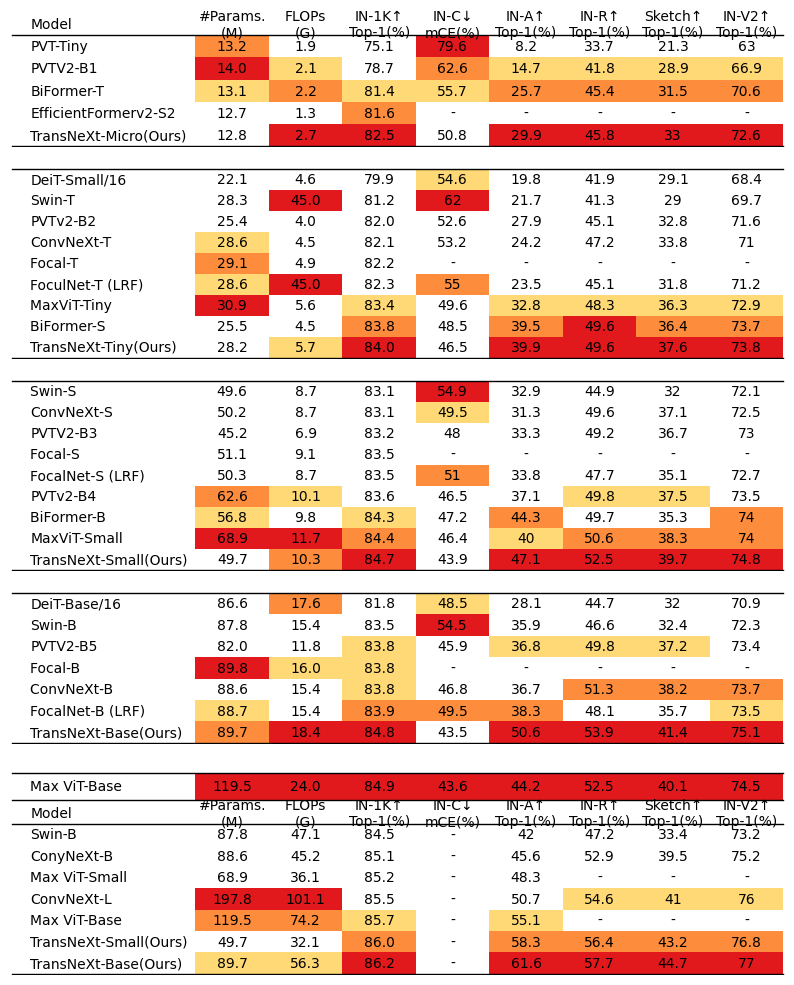

In [189]:

# 超参数
face_color_ours = "lightcyan"    # 本人研究数据行的背景颜色
header_width = 2.5               # 列表头的宽度

# 原始数据的读取和处理
data_frame_all = pd.read_excel('datas/TransNeXt Comparison.xlsx')
data_frame_all.set_index('Model', inplace=True)  # 设置索引 index 为 Model 列
data_frame_all.style.background_gradient(cmap="viridis")

# 分析表格数据，将表格按照 NaN 区域分块
data_frames: list[pd.DataFrame] = []
headers = []
i_header = 0
for i in np.arange(len(data_frame_all)):
    row = data_frame_all.iloc[i]    # iloc：index locate，用 index 索引定位；loc：locate，使用标签（column 名）定位
    header_next = row.values[0]
    if math.isnan(header_next):     # 遇到 NaN 区域，分块
        header = row.name
        headers.append(header if isinstance(header, str) else None)
        if  i_header != i:
            data_frames.append(data_frame_all.iloc[i_header:i])
        i_header = i + 1
data_frames.append(data_frame_all.iloc[i_header:])

num_data_frames = len(data_frames)

# 创建图表
height_ratios = [2 + len(data_frame) for data_frame in data_frames]
height = sum(height_ratios)
fig, axes = plot.subplots(num_data_frames, 1, height_ratios=height_ratios,
                          figsize=(10, height / 4), dpi=100)
plot.subplots_adjust(hspace=0)  # 调整所有子图 height space 间隔为 0

# 自定义颜色映射，参考：https://blog.csdn.net/mr_cat123/article/details/78638491
color_offset = 1
cmap = plot.cm.get_cmap("YlOrRd")    # 自定义颜色映射

# 定义颜色映射函数，用于绘制 Top K 值的颜色，如果 x 在 Top K 值中，则返回对应颜色，否则返回白色
def TopK_cmap(x, data_frame, i_column, k, cmap, reverse=False):
    # 移除数据列中的无效数据，比如 "-", "N/A", "nan", "_" 等，并保留数值型数据
    valid_values = [
        value for value in data_frame.iloc[:, i_column].values 
        if isinstance(value, (int, float)) and not math.isnan(value)
    ]
    # 计算 Top K 值
    topk = sorted(valid_values, reverse=True)[:k]
    for j, value in enumerate(topk):
        position = j if reverse else k - j - 1
        if value == x:
            return cmap((position + color_offset) / (k + color_offset * 2 - 1))
    return "white"

# 绘制图表
for i in np.arange(num_data_frames):
    data_frame: pd.DataFrame = data_frames[i]
    header = headers[i]
    ax = axes[i]
    
    column_definitions = (          # 每列表格文字等属性
        [    # 定义每一列的属性
            ColumnDefinition(
                name="Model",
                textprops={'ha': "left"},
                width=header_width
            ),
        ] +
        [
            ColumnDefinition(
                name=column,
                title=column,
                textprops={'ha': "center"},
                cmap=lambda x, j=i_column: TopK_cmap(x, data_frame, j, k=3, cmap=cmap)
            )
            for i_column, column in enumerate(data_frame.columns)
        ]
    ) if header is not None else (
        [    # 定义每一列的属性
            ColumnDefinition(
                name="Model",
                title="",
                textprops={'ha': "left"},
                width=header_width,
            ),
        ] +
        [
            ColumnDefinition(
                name=column,
                title="",
                textprops={'ha': "center"},
                cmap=lambda x, j=i_column: TopK_cmap(x, data_frame, j, k=3, cmap=cmap)
            )
            for i_column, column in enumerate(data_frame.columns)
        ]
    )    
    table = Table(data_frame, ax=ax,
                  column_definitions=column_definitions,
                  row_dividers=False,
                  footer_divider=True,
                  col_label_divider=True)

plot.show()

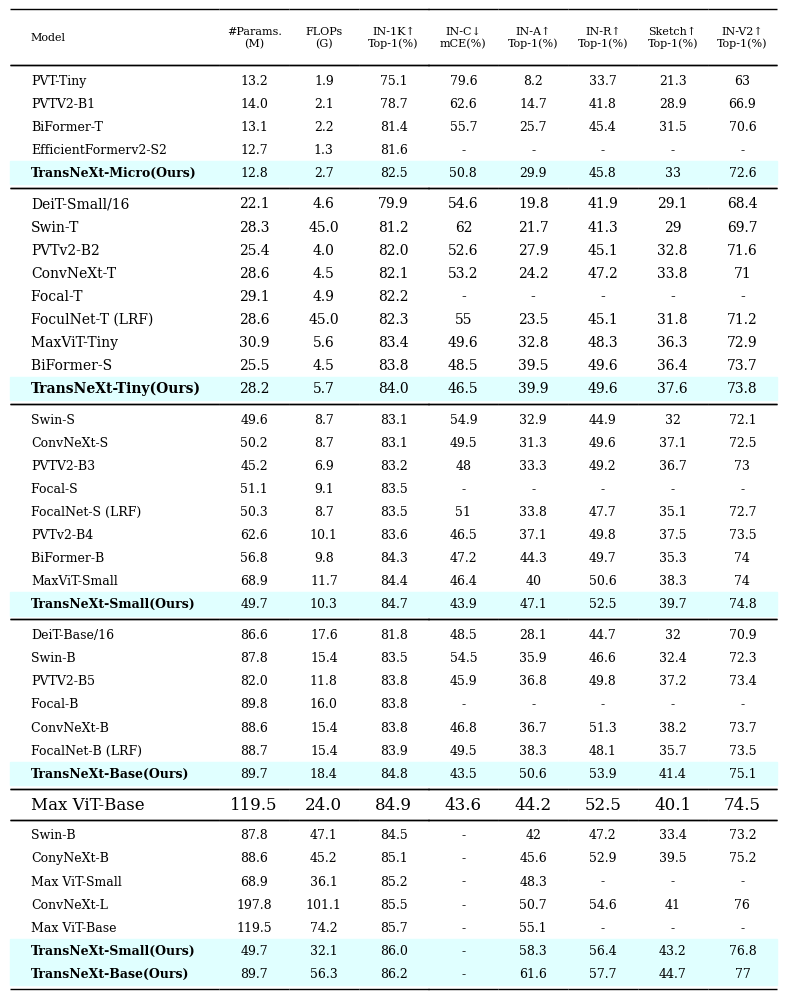

In [203]:

# 超参数
face_color_ours = "lightcyan"    # 研究数据行的背景颜色
header_height = 2.5              # 行表头的高度
header_width = 2.7               # 列表头的宽度
cell_height = 1.2                # 列表格的高度
cell_width = 0.9                 # 列表格的宽度
seperator_height = 0.2           # 表格之间的分割线高度

# 原始数据的读取和处理
data_frame_all = pd.read_excel("datas/TransNeXt Comparison.xlsx")
data_frame_all.set_index("Model", inplace=True)  # 设置索引 index 为 Model 列
data_frame_all.style.background_gradient(cmap="viridis")

# 分析表格数据，将表格按照 NaN 区域分块
data_frames: list[pd.DataFrame] = [
    pd.DataFrame([data_frame_all.columns.values],   # 添加表头
                 index=[data_frame_all.index.name], 
                 columns=data_frame_all.columns)
]
headers = [None]
i_header = 0
# 表格数据分块
for i in np.arange(len(data_frame_all)):
    row = data_frame_all.iloc[i]    # iloc：index locate，用 index 索引定位；loc：locate，使用标签（column 名）定位
    header_next = row.values[0]
    if math.isnan(header_next):     # 遇到 NaN 区域，分块
        header = row.name
        headers.append(header if isinstance(header, str) else None)
        if  i_header != i:
            data_frames.append(data_frame_all.iloc[i_header:i])
        i_header = i + 1
data_frames.append(data_frame_all.iloc[i_header:])

num_data_frames = len(data_frames)

# 创建图表
height_ratios = ([header_height + 2 * seperator_height] 
                 + [len(data_frame) * cell_height + 2 * seperator_height for data_frame in data_frames[1:]])
height = sum(height_ratios)
width = header_width + cell_width * len(data_frame_all.columns)
fig, axes = plot.subplots(num_data_frames, 1, height_ratios=height_ratios,
                          figsize=(width, height / 4), dpi=100)
plot.subplots_adjust(hspace=0)  # 调整所有子图 height space 间隔为 0

# 绘制对所有块的图表
widths = [header_width] + [cell_width] * len(data_frame_all.columns)
widths = np.multiply(widths, 1/ sum(widths))
edge_color_ours = {'L': face_color_ours, 'R': "black", 'T': face_color_ours, 'B': face_color_ours}
for i_frame in np.arange(0, num_data_frames):
    data_frame: pd.DataFrame = data_frames[i_frame]
    header = headers[i_frame]
    ax: plot.Axes = axes[i_frame]
    
    data_frame.insert(0, "Model", data_frame.index)             # 插入一列 Model 列作为表头，方便后续宽度设置
    empty_row = pd.DataFrame([[np.nan] * len(data_frame.columns)], columns=data_frame.columns)
    data_frame = pd.concat([empty_row, data_frame, empty_row])  # 在第一行和最后一行插入空行
    rows = len(data_frame.index)
    cols = len(data_frame.columns)
    
    ax.axis("off")
    table: matplotlib.table.Table = ax.table(
        cellText=data_frame.values,
        cellLoc="center",
        bbox=[0, 0, 1, 1],
        edges="open")
    table.set_fontsize(12)
    
    # 设置单元格宽高
    for i in np.arange(rows):
        for j in np.arange(cols):
            table[i, j].set(width=widths[j], height=cell_height)  # 设置列宽和行高
            table[i, j].set_text_props(fontfamily="serif")
            
    for i in np.arange(rows):       # 设置每行属性
        cell_header: matplotlib.table.Cell = table[i, 0]
        cell_header.set_text_props(horizontalalignment="left")        # 表头左对齐
        # cell_header.visible_edges += "R"                            # 表头边框为右边框
        text: matplotlib.text.Text = cell_header.get_text()
        if text.get_text().__contains__("Ours"):
            cell_header.set_text_props(weight=FontWeight.BOLD.value)  # 表头带 Ours 的文字字体加粗
            for j in np.arange(cols):                                 # 设置该行所有单元格的背景颜色
                table[i, j].visible_edges = "closed"
                table[i, j].set(edgecolor=face_color_ours, facecolor=face_color_ours)
        elif text.get_text().lower() == "nan":
            if i == 0:
                for j in np.arange(cols):              # 该行所有单元格的边颜色
                    table[i, j].get_text().set_text("")       # 内容设置为空
                    table[i, j].set(edgecolor="black")        # 边框颜色设置为黑色
                    table[i, j].visible_edges = "T"           # 边框设置为"上"边框
                    table[i, j].set(height=seperator_height)  # 设置单元格高度
            elif i == rows - 1:
                for j in np.arange(cols):              # 该行所有单元格的边颜色
                    table[i, j].get_text().set_text("")       # 内容设置为空
                    table[i, j].set(edgecolor="black")        # 边框颜色设置为黑色
                    table[i, j].visible_edges = "B"           # 边框设置为"下"边框
                    table[i, j].set(height=seperator_height)  # 设置单元格高度
            
plot.show()